In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("income_evaluation.csv")

In [3]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.isnull().any()

age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income            False
dtype: bool

In [7]:
data = data.rename(columns={"age":"age",
    " workclass": "workclass",
    " fnlwgt": "final_weight",
    " education":"education",
    " education-num":"education_num",
    " marital-status":"marital_status",
    " occupation":"occupation",
    " relationship":"relationship",
    " race":"race",
    " sex":"gender",
    " capital-gain":"capital_gain",
    " capital-loss":"capital_loss",
    " hours-per-week":"hrs_per_week",
    " native-country":"native_country",
    " income":"income"
})

In [8]:
data.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
data["income"].unique()
data["income_encoded"] = [1 if value == "50K" else  0 for value in data.income.values]
data["income_encoded"].unique()

array([0])

In [11]:
data.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hrs_per_week,income_encoded
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.0
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.0
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.0
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.0
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.0
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,0.0


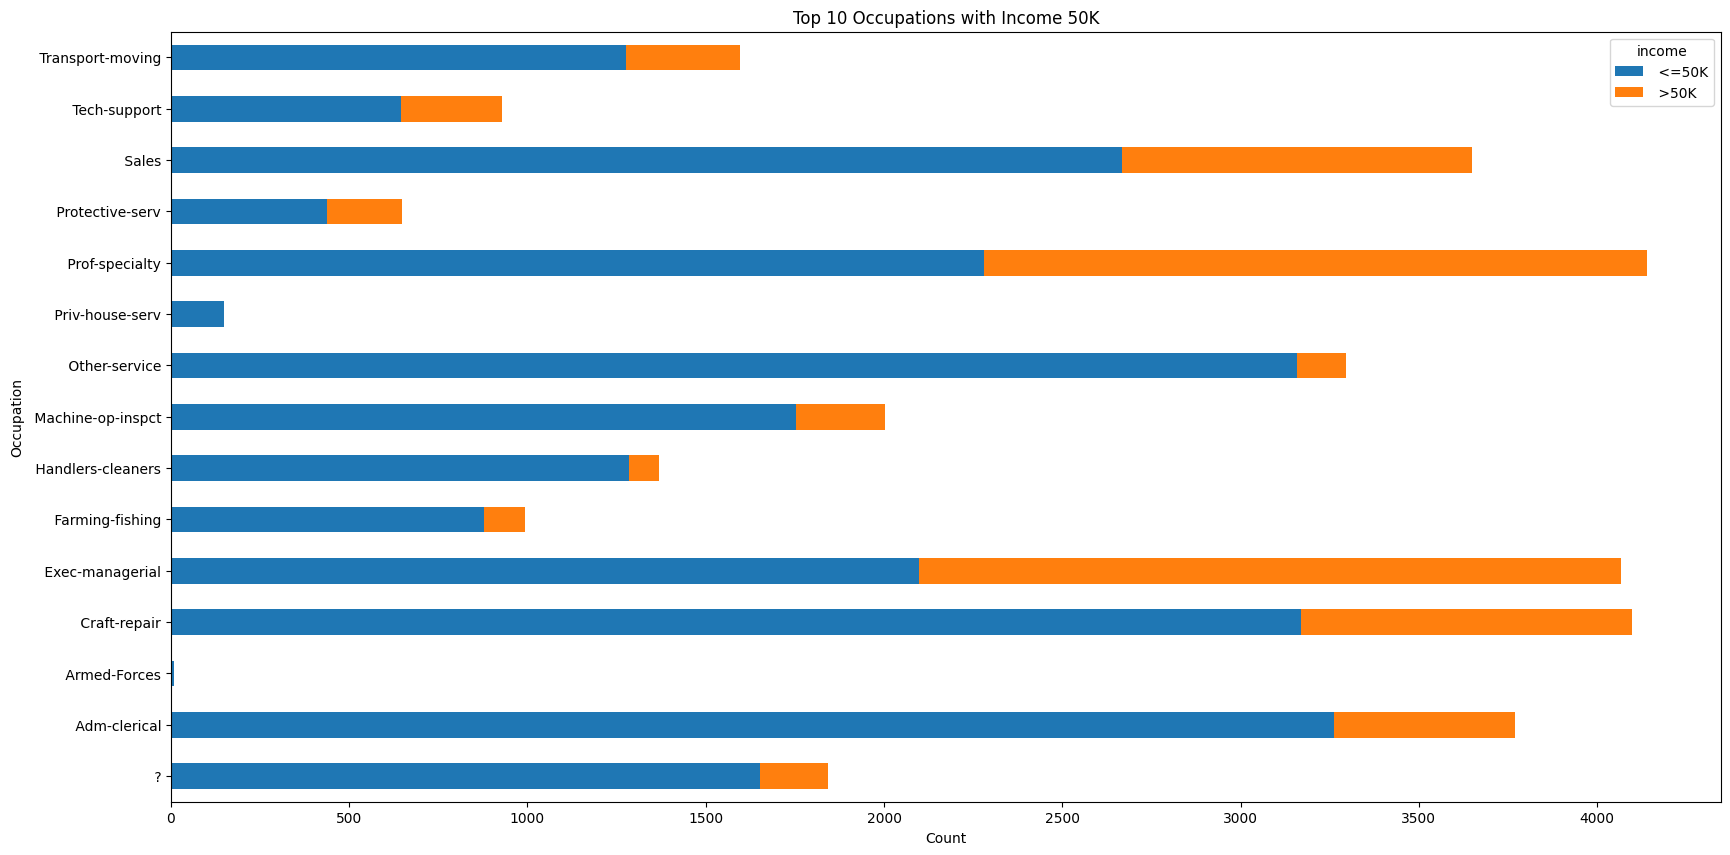

In [14]:
data[data["income"] == "50K"]["occupation"].value_counts().head(10)
pd.crosstab(data["occupation"], data["income"]).plot( kind="barh", stacked=True, figsize=(20, 10) )
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Top 10 Occupations with Income 50K')
plt.savefig('occupation_income_50k.jpg')
plt.show()